<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="resources/img/softbutterfly-logo.png" class="pull-left" style="display: block; height: 40px; margin: 0;"><img src="resources/img/jupyter-logo.png" class="pull-right"  style="display: block; height: 20px; margin-top: 10px;">
</div>

<h1>Jupyter Notebok: Un entorno de programación interactivo<br><small>Parte I: Ejemplos básico</small></h1>

<b>Martín Josemaría Vuelta Rojas</b><br><br>
<i>Universidad Nacional Mayor de San Marcos</i><br>
<span>Facultad de Ciencias Físicas</span><br><br>
<i>SoftButterfly</i><br>
<span>Cofundador y Líder del Área de Desarrollo</span>

<h2>Algunos ejemplos de <a href="https://projecteuler.net/" taget="_blank" style="text-decoration: none; color:#1b809e">Proyecto Euler</a></h2>

<div style="padding: 16px; border: 1px solid #dedede; border-left: 5px solid #1b809e; border-radius: 4px;margin:0;">
<h3 style="color:#1b809e; margin: 0; font-weight: normal;">Problema 1</h3>

<p>
Si enumeramos todos los números naturales por debajo de 10 que son múltiplos de 3 o 5, obtenemos 3, 5, 6 y 9. La suma de estos múltiplos es 23.
</p>

<p>
Calcula la suma de todos los múltiplos de 3 o 5 por debajo de 1000.
</p>
</div>

In [1]:
result = 0

for n in range(1000):
    if n % 3 == 0 or n % 5 == 0:
        result = result + n

print("Result: {0}".format(result))       

Result: 233168


In [2]:
print("Result: {0}".format(sum(filter(lambda x: x % 3 == 0 or x % 5 == 0, range(1000)))))

Result: 233168


<div style="padding: 16px; border: 1px solid #dedede; border-left: 5px solid #1b809e; border-radius: 4px;margin:0;">
<h3 style="color:#1b809e; margin: 0; font-weight: normal;">Problema 2</h3>

<p>
Cada nuevo término en la secuencia de Fibonacci se genera sumando los dos términos anteriores. Comenzando con 1 y 2, los primeros 10 términos serán:
</p>

<center>
1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...
</center>

<p>
Considerando los términos en la secuencia de Fibonacci cuyos valores no exceden los cuatro millones, encuentre la suma de los términos pares.
</p>
</div>

In [3]:
def fib(n):
    if n < 1:
        raise(ValueError('Positional argument "n" ust be greater than 0'))
    if n == 1 or n == 2:
        return 1
    
    return fib(n-1) + fib(n-2)

n = 1
fibn = 0
result = 0

while fibn < 4000000:
    if n % 2 == 0:
        fibn = fib(n)
        result = result + fibn
    
    n = n + 1

print("Result: {0}".format(result))

Result: 9227464


<h2>Plinomios de Hermite</h2>

<div style="padding: 16px; border: 1px solid #dedede; border-left: 5px solid #1b809e; border-radius: 4px;margin:0;">
<h3 style="color:#1b809e; margin: 0; font-weight: normal;">Polinomios de Hermite</h3>

<p>
Los polinomios de Hermite se pueden representar mendiante su fórmula de Rodrigues como
</p>

<p>
$$
H_{k}\left(x\right) = \left(-1\right)^k{\textrm{e}}^{{x}^{2}}\frac{\partial ^k}{\partial x^k}\left({\textrm{e}}^{-{x}^{2}}\right)
$$
</p>
<p>
En el cálculo de $H_k\left(x\right)$ es común hacer uso de la regla de recurrencia
</p>

<p>
$$
H_{k+1}\left(\xi\right)=2{\xi}H_k\left(\xi\right)-2kH_{k-1}\left(\xi\right).
$$
</p>
</div>

In [4]:
def Hermite(n, x):
    if n == 0:
        return 1
    
    hermite_v = [1, 2 * x]
    
    for m in range(2, n + 1):
        hermite_v.append(
            2 * x * hermite_v[m - 1] - 2 * (m - 1) * hermite_v[m - 2]
        )
        
    return hermite_v[n]

In [5]:
%matplotlib inline

In [6]:
# Ajustes generales para los gráficos
# Para poder usar 'usetex=True' es necesario haber instalado latex
from matplotlib.font_manager import *
from matplotlib.pylab import *

ioff()

rc(
    'lines',
    linewidth=1)

rc(
    'text',
    usetex=True)

rc(
    'font',
    family='Times New Roman')

font_title = FontProperties(size=24)
font_label = FontProperties(size=22)
font_ticks = FontProperties(size=16)
font_legend = FontProperties(size=20)

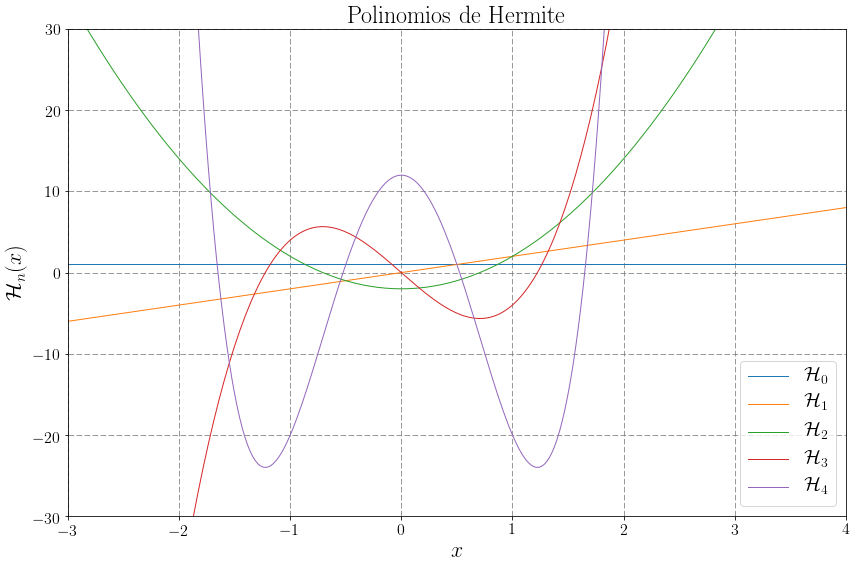

In [7]:
# Gráfico de los polinomios de hermite de ordenes 0 hasta el 4
fig = figure(figsize=(12, 8), frameon=False)
axs = fig.add_subplot('111')

X = linspace(-3, 4, 300)

for n in range(5):
    Y = [Hermite(n, x) for x in X]
    axs.plot(X, Y, label="$\mathcal{H}_{" + "{0}".format(n) + "}$")

axs.set_xlim(-3, 4)
axs.set_xlabel("$x$", fontproperties=font_label)
axs.set_xticks([x for x in range(-3,5)])
axs.set_xticklabels(["${0}$".format(x) for x in range(-3,5)], fontproperties=font_ticks)

axs.set_ylim(-30, 30)
axs.set_ylabel("$\mathcal{H}_n(x)$", fontproperties=font_label)
axs.set_yticks([x for x in range(-30,40,10)])
axs.set_yticklabels(["${0}$".format(x) for x in range(-30,40,10)], fontproperties=font_ticks)

axs.set_title("$\mathrm{Polinomios\ de\ Hermite}$", fontproperties=font_title)

axs.legend(loc=4, prop=font_legend)
axs.grid('on', color='0.5',linestyle='--')
tight_layout()
show()

<h2>Función de onda del Oscilador Armónico Cuántico</h2>

<div style="padding: 16px; border: 1px solid #dedede; border-left: 5px solid #1b809e; border-radius: 4px;margin:0;">
<h3 style="color:#1b809e; margin: 0; font-weight: normal;">Función de onda</h3>

<p>
La funcion de onda del oscilador armónico cuántico se expresa en términos de los polinomios de Hermite de la siguiente forma
</p>

<p>
$$
\psi_k(\xi)=
\frac{1}{\sqrt{k!2^k\sqrt{\pi}}}
H_k\left(\xi\right)
{\textrm{e}}^{-{\frac{1}{2}\xi^2}}
$$
</p>
</div>

In [8]:
def factorial(n):
    return 1 if n == 0 else n * factorial(n - 1)

In [9]:
def Psi(n, x):
    return (
        pow(pi, -0.25) * 
        pow(2.0, -0.5 * n) *
        pow(factorial(n), -0.5) *
        Hermite(n, x) *
        exp(-0.5*pow(x,2))
    )

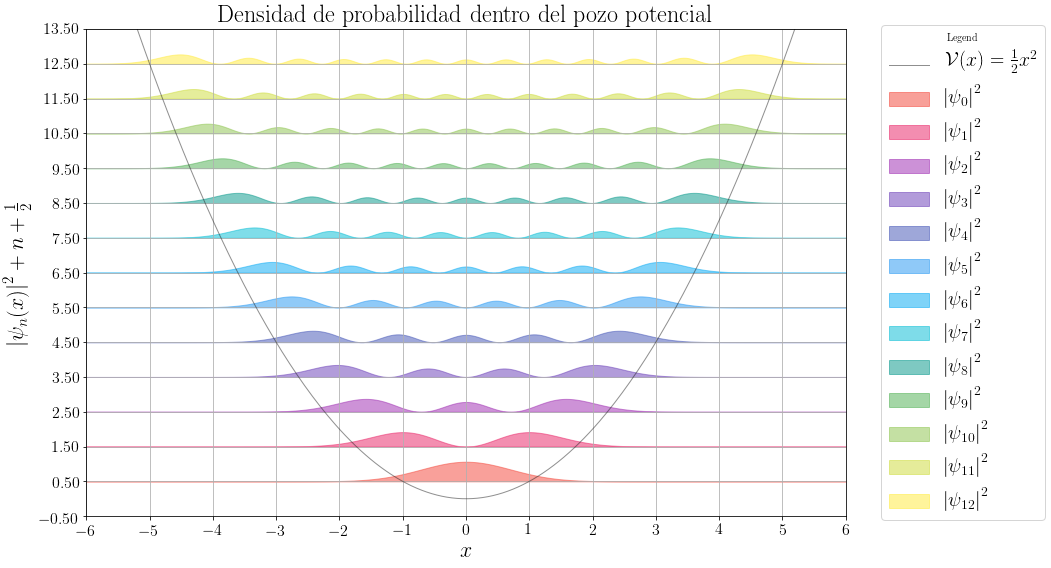

In [10]:
# Neat Example!!
# Gráfico de las funciones de onda desde el orden 0 hasta el 12
C = {
    -1: "#212121",
    0: "#F44336",
    1: "#E91E63",
    2: "#9C27B0",
    3: "#673AB7",
    4: "#3F51B5",
    5: "#2196F3",
    6: "#03A9F4",
    7: "#00BCD4",
    8: "#009688",
    9: "#4CAF50",
    10: "#8BC34A",
    11: "#CDDC39",
    12: "#FFEB3B",
    13: "#FFC107",
    14: "#FF9800",
    15: "#FF5722",
}

fig = figure(figsize=(12, 8), frameon=False)

axs = fig.add_subplot('111')

X = linspace(-6, 6, 300)
Y = [0.5*x**2 for x in X]

axs.plot(X, Y, label="$\mathcal{V}(x)=\\frac{1}{2}x^{2}$", color=C[-1], alpha=0.5, linewidth=1)


for n in range(13):
    X = linspace(-6, 6, 300)
    Y = [Psi(n, x)**2 + n + 0.5 for x in X]
    
    axs.fill_between(X, n+0.5, Y, label="$\\left|\mathcal{\psi}_{" + "{0}".format(n) + "}\\right|^{2}$",
                    facecolor=C[n%16], alpha=0.5, color=C[n%16] )

axs.set_xlim(-6, 6)
axs.set_xlabel("$x$", fontproperties=font_label)
axs.set_xticks([x for x in range(-6,7)])
axs.set_xticklabels(["${0}$".format(x) for x in range(-6,7)], fontproperties=font_ticks)

axs.set_ylim(-0.5, 13.5)
axs.set_ylabel("$\\left|\mathcal{\psi}_n(x)\\right|^{2} + n + \\frac{1}{2}$", fontproperties=font_label)
axs.set_yticks(linspace(-0.5,13.5,15))
axs.set_yticklabels(["${0:.2f}$".format(y) for y in linspace(-0.5,13.5,15)], fontproperties=font_ticks)

axs.set_title("$\mathrm{Densidad\ de\ probabilidad\ dentro\ del\ pozo\ potencial}$", fontproperties=font_title)

axs.legend(loc='center right', bbox_to_anchor=(1.275, 0.5), prop=font_legend, title="Legend")

axs.grid('on')

tight_layout()    
show()